In [32]:
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from keras.models import load_model

lemmatizer = WordNetLemmatizer()

words = []
classes = []
documents = []
ignore_word = ['?','!']
data_file = open("models\intents_final.json").read()
intents = json.loads(data_file)

In [33]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))

        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [34]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_word]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print(len(documents), "documents")
print(len(classes), "classes", classes)
print(len(words), "unique lematized words", words)

pickle.dump(words,open('text_final.pkl','wb'))
pickle.dump(classes,open('labels_final.pkl','wb'))

69 documents
25 classes ['1', '2', '3', '4', '5', '6', '7', '8', 'curhat1', 'curhat10', 'curhat11', 'curhat12', 'curhat13', 'curhat14', 'curhat15', 'curhat2', 'curhat3', 'curhat4', 'curhat5', 'curhat6', 'curhat7', 'curhat8', 'goodbye', 'salam', 'terimakasih']
375 unique lematized words [',', '.', '...', '1', '1,7', '1.apa', '2', '2.apa', '3', '3.gejala', '4', '4.bagaimana', '5', '5.kalo', '6', '6.bahaya', '7', '7.apakah', '8', '8.curhat', 'abis', 'ada', 'agar', 'air', 'aja', 'akan', 'akhir', 'akhir-akhir', 'aktivitas', 'aku', 'alami', 'alasan', 'aman', 'anak', 'anjlok', 'apa', 'apakah', 'apapun', 'asa', 'atau', 'awalnya', 'badan', 'bagaimana', 'bahaya', 'bahkan', 'baik', 'banget', 'banyak', 'barang', 'baru', 'bawa', 'bawaanya', 'beberapa', 'bebrapa', 'begadang', 'benci', 'berada', 'beranggapan', 'berbeda', 'berguna', 'berharga', 'berkepanjangan', 'berlanjut', 'berlebihan', 'berpisah', 'bertahan', 'bertanya', 'bertemu', 'biaya', 'bilang', 'bisa', 'broken', 'bulan', 'bunuh', 'butuh', 'by

In [35]:
training = []

output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_word = doc[0]

    pattern_word = [lemmatizer.lemmatize(word.lower()) for word in pattern_word]

    for w in words:
        bag.append(1) if w in pattern_word else bag.append(0)
    
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)

train_x = list(training[:,0])
train_y = list(training[:,1])

print('Training data complete!')

Training data complete!


In [36]:
model = Sequential()
model.add(Dense(69, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(np.array(train_x), np.array(train_y), epochs=400, batch_size=5, verbose=1)


Epoch 1/400
14/14 [==============================] - 1s 2ms/step - loss: 3.2297 - accuracy: 0.1304
Epoch 2/400
14/14 [==============================] - 0s 2ms/step - loss: 3.1056 - accuracy: 0.2174
Epoch 3/400
14/14 [==============================] - 0s 3ms/step - loss: 2.9750 - accuracy: 0.2174
Epoch 4/400
14/14 [==============================] - 0s 3ms/step - loss: 2.8303 - accuracy: 0.2319
Epoch 5/400
14/14 [==============================] - 0s 2ms/step - loss: 2.6890 - accuracy: 0.2319
Epoch 6/400
14/14 [==============================] - 0s 2ms/step - loss: 2.5338 - accuracy: 0.2899
Epoch 7/400
14/14 [==============================] - 0s 2ms/step - loss: 2.3603 - accuracy: 0.3188
Epoch 8/400
14/14 [==============================] - 0s 2ms/step - loss: 2.1795 - accuracy: 0.3333
Epoch 9/400
14/14 [==============================] - 0s 2ms/step - loss: 2.0076 - accuracy: 0.4058
Epoch 10/400
14/14 [==============================] - 0s 2ms/step - loss: 1.8050 - accuracy: 0.5652
Epoch 11/

In [37]:
model.save('chatbot_model_final.h5', hist)
print("\n")
print("*" * 50)
print("\n Model Created Complete!")



**************************************************

 Model Created Complete!


In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 69)                25944     
                                                                 
 dense_25 (Dense)            (None, 128)               8960      
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 25)                1625      
                                                                 
Total params: 44,785
Trainable params: 44,785
Non-trainable params: 0
_________________________________________________________________


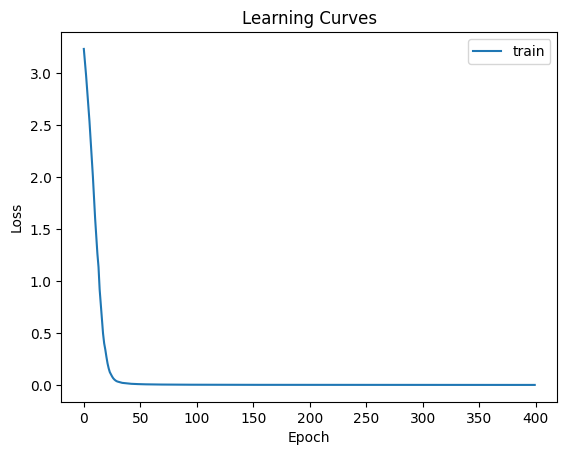

In [42]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.legend()
pyplot.show()

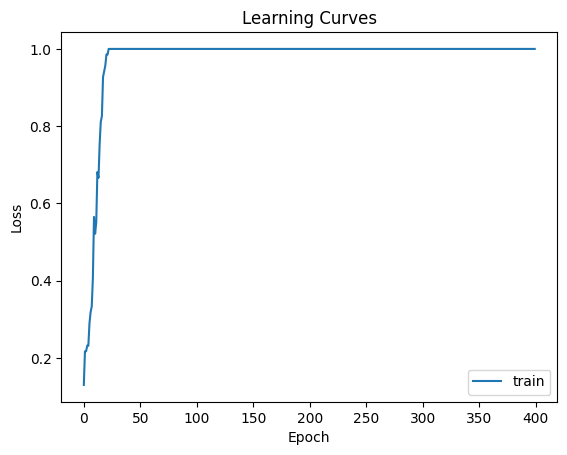

In [43]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(hist.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()